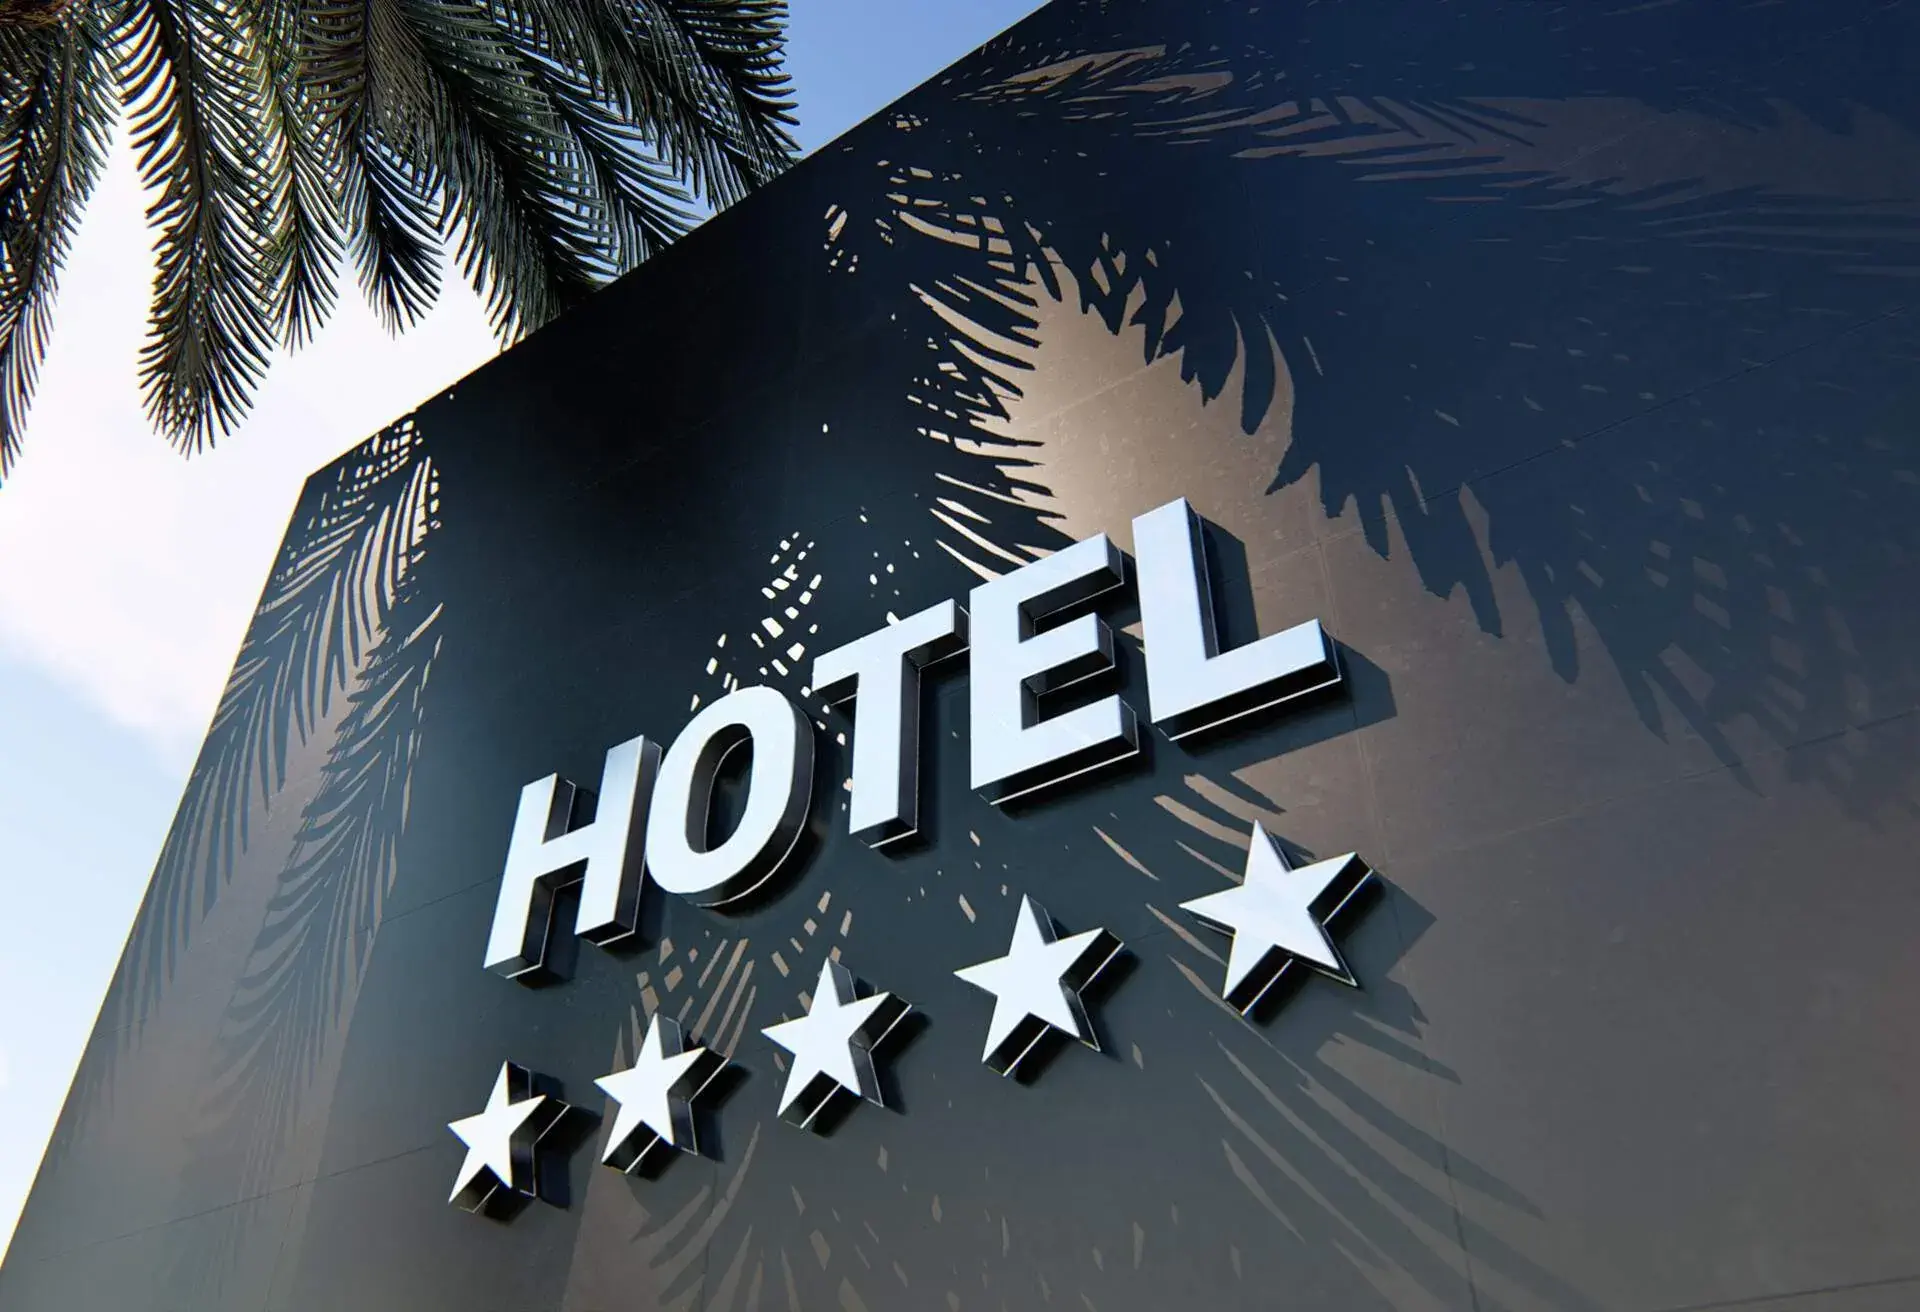

# Hotel Bookings

### 🏨Executive Summary 

Hotels collect detailed booking information — such as arrival dates, length of stay, guest count, and booking status — but this raw data does not clearly indicate which customers or reservations offer the most value to the business.
Without insights derived from factors such as actual revenue contribution, customer value segmentation, or loyalty patterns, hotel managers lack the ability to:
1.	Determine their most profitable customer segments🚩
2.	Assess reservation patterns that result in cancellations or short stays🚩
3.	Create impactful pricing, promotional, and retention strategies🚩

Consequently, the business problem is the absence of actionable intelligence in the raw dataset. The objective of the project is to fill this gap by enhancing the data with analytical features that measure value, loyalty, and booking performance — turning operational records into actionable insights for decision-making.

The Hotel Booking Demand dataset includes comprehensive records of bookings, including arrival dates, stay durations, customer types, and booking statuses. Nonetheless, although it contains abundant operational data, it is deficient in high-level business metrics that reveal customer behaviour and trends in hotel performance.

To extract actionable insights, we systematically cleaned and validated the data — handling missing values, removing duplicates, and correcting outliers — and engineered new features that reflect guest value, loyalty, booking risk, and seasonal trends.

This feature engineering focuses on converting a raw hotel booking dataset into a more informative and analysis-ready format by identifying missing business information and creating valuable features.
Key enrichments include:
1.	Cancellation Risk Scores✅
Quantifies the probability of a booking being cancelled (0–100) using key risk factors such as lead time, seasonality, market segment, and booking characteristics, enabling better overbooking and pricing strategies.
2.	Guest Loyalty Segmentation✅
Classifies guests into high, medium, or low loyalty tiers based on behavioural indicators such as repeat bookings and past cancellations, supporting customer retention and rewards programs.
3.	Revenue and Profitability Indicators✅
Categorises each booking by arrival month to capture temporal demand trends and guide pricing and resource allocation decisions.

These engineered features convert the Hotel Booking Demand dataset from raw operational data into a decision-support resource, offering practical insights that improve hotel performance, profitability, and strategic planning.


In [1]:
import pandas as pd

In [2]:
### 1) Load dataset ###
def Load_csv(path_in: str = "hotel_bookings.csv") -> pd.DataFrame:
    """
    Load dataset into a pandas DataFrame.
    """
    df = pd.read_csv(path_in)
    print(f"Loaded: {path_in}")
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns\n")
    return df

In [3]:
### 2) Find and summarize missing value in each columns ###
def Find_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Find missing values in each column and summarize.
    """
    na_count = df.isna().sum().sort_values(ascending=False)
    na_pct = (df.isna().mean() * 100).round(2).sort_values(ascending=False)
    missing_summary = pd.DataFrame({"missing_count": na_count, "missing_pct": na_pct})
    print("Missing values by column (pre-cleaning):")
    print(missing_summary[missing_summary["missing_count"] > 0])
    print(f"\nTotal missing cells: {int(df.isna().sum().sum()):,}")
    print(f"Rows with ≥1 missing value: {int(df.isna().any(axis=1).sum()):,}\n")
    return df


In [4]:
### 3) Find and remove duplicate rows ###
def Remove_dup_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Find and drop duplicates in the DataFrame.
    """
    dup_count = int(df.duplicated(keep="first").sum())
    print(f"Exact duplicate rows (pre-cleaning): {dup_count:,}")
    before = len(df)
    df = df.drop_duplicates(keep="first").reset_index(drop=True)

    print(f"Removed {before - len(df)} duplicates. New shape: {df.shape}\n")
    return df

In [5]:
### 4) Data cleaning / imputation ###
def Fill_zero_col(df: pd.DataFrame) -> pd.DataFrame: 
    """
    Fill 0 for missing data in columns "agent", "children", "company" 
    """
    # Fill 0 for agent, children, company 
    zero_fill_cols = [ "children", "company", "agent"]
    for col in zero_fill_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)
            # keep as integer if possible
            try:
                df[col] = df[col].astype("Int64")
            except Exception:
                pass
    return df

In [6]:
def Fill_mode_col(df: pd.DataFrame) -> pd.DataFrame: 
    """
    Fill mode for missing data in columns "country"
    """
    # Fill mode for country
    if "country" in df.columns:
        mode_country = df["country"].mode(dropna=True)
        mode_country_value = mode_country.iloc[0] if not mode_country.empty else "Unknown"
        df["country"] = df["country"].fillna(mode_country_value).astype(str)
    return df

In [7]:
def Convert_neg_values(df: pd.DataFrame) -> pd.DataFrame: 
    """
    Convert negative values to zero for numeric columns 
    """
    # Convert negative values to zero (numeric columns only)
    num_cols = df.select_dtypes(include=["number"]).columns
    # Count negatives per numeric column
    neg_col_counts = (df[num_cols] < 0).sum()
    cols_with_negs = neg_col_counts[neg_col_counts > 0]
    # Replace negatives with 0 in ALL numeric columns with negatives
    df[num_cols] = df[num_cols].clip(lower=0)

    if not cols_with_negs.empty:
        print("Negative values found and set to 0 in numeric columns:")
        # Summarize columns with negative values
        print(cols_with_negs.rename("negatives_corrected").to_frame())
    else:
        print("No negative numeric values found.\n")
    return df

In [8]:
"""### 5) Save cleaned dataset ###
def Save_csv(df: pd.DataFrame, path_out: str = "hotel_bookings_cleaned.csv") -> pd.DataFrame:

    Save and output cleaned dataset into a csv file

    df.to_csv(path_out, index=False)
    print(f"\nSaved cleaned dataset to: {path_out}")
    return df"""
    

'### 5) Save cleaned dataset ###\ndef Save_csv(df: pd.DataFrame, path_out: str = "hotel_bookings_cleaned.csv") -> pd.DataFrame:\n\n    Save and output cleaned dataset into a csv file\n\n    df.to_csv(path_out, index=False)\n    print(f"\nSaved cleaned dataset to: {path_out}")\n    return df'

In [9]:
"""def main():
    df = Load_csv(path_in = "hotel_bookings.csv")
    Find_missing_values(df)
    df = Remove_dup_values(df)
df3 = Fill_zero_col(df2)
df4 = Fill_mode_col(df3)
df5 = Convert_neg_values(df4)
cleaned_df = Save_csv(df5, path_out="hotel_bookings_cleaned.csv")"""

'def main():\n    df = Load_csv(path_in = "hotel_bookings.csv")\n    Find_missing_values(df)\n    df = Remove_dup_values(df)\ndf3 = Fill_zero_col(df2)\ndf4 = Fill_mode_col(df3)\ndf5 = Convert_neg_values(df4)\ncleaned_df = Save_csv(df5, path_out="hotel_bookings_cleaned.csv")'

Feature 1 , 2 , 3 

Feature 1

In [10]:
def cal_len_of_stay(data):
    total_stay = []
    number = len(data)
    for x in range(number):
        total = data.loc[x, "stays_in_week_nights"] + data.loc[x, "stays_in_weekend_nights"]
        total_stay.append(total)
    return total_stay

In [11]:
"""def outliers_cap(data, percentile=0.95):
    cleaned=[]
    sorted_data = sorted(data)
    number = len(sorted_data)
    index = int(percentile * (number-1))
    data_cap = sorted_data[index]
    
    for x in data:
            if x>data_cap:
                cleaned.append(data_cap)
            else:
                cleaned.append(x)
    return cleaned"""

'def outliers_cap(data, percentile=0.95):\n    cleaned=[]\n    sorted_data = sorted(data)\n    number = len(sorted_data)\n    index = int(percentile * (number-1))\n    data_cap = sorted_data[index]\n    \n    for x in data:\n            if x>data_cap:\n                cleaned.append(data_cap)\n            else:\n                cleaned.append(x)\n    return cleaned'

In [12]:
def len_of_stay(data) -> pd.DataFrame:
    total_stay = cal_len_of_stay(data)
    #without_outliers = outliers_cap(total_stay)
    data["len_of_stay"] = total_stay
    return data

Feature 2 

In [13]:
"""def negative_values(data):
    cleaned= []
    for x in data:
        if x < 0:
            cleaned.append(0)
        else:
            cleaned.append(x)
    return cleaned"""

'def negative_values(data):\n    cleaned= []\n    for x in data:\n        if x < 0:\n            cleaned.append(0)\n        else:\n            cleaned.append(x)\n    return cleaned'

In [14]:
def revenue_booking(data):
    
    revenue=[]
    # data["adr"] = negative_values(data["adr"])
    
    n = len(data)
    
    for x in range(n):
        if (data.loc[x, "is_canceled"]==1):
            revenue.append(0)
        else:
            adr = data.loc[x, "adr"]
            len_stay = data.loc[x, "len_of_stay"]
            revenue.append(adr*len_stay)
    data["revenue_booking"]= revenue
    # test
    print(data["revenue_booking"].describe())
    return data

Feature 3 (late_booking_flag: 1 if lead_time < 7 days)

In [15]:
def late_booking_flag(data):
    flag_late = []
    values = data["lead_time"]
    for x in values:
        if x<7:
            flag_late.append(1)
        else:
            flag_late.append(0)
    data["late_booking_flag"] = flag_late
    # test
    print(data["late_booking_flag"].unique())
    return data

feature 5

In [16]:
def segment_value(df , bins: int = 3):
    df["segment_value"] = pd.cut(
        df["revenue_booking"], bins=bins, labels=["Low", "Medium", "High"], include_lowest=True
    ).astype("category")
    return df

feature 6

In [30]:
#loyality check 

import pandas as pd

df = pd.read_csv("hotel_bookings.csv")

# Loyalty check: repeated guest OR has previous cancellations
df['loyal_check'] = ((df['is_repeated_guest'] == 1) | (df['previous_cancellations'] > 0)).astype(int)

# 1 = loyal (meets either condition), 0 = not loyal
print(df[['is_repeated_guest', 'previous_cancellations', 'loyal_check']].head(10))

   is_repeated_guest  previous_cancellations  loyal_check
0                  0                       0            0
1                  0                       0            0
2                  0                       0            0
3                  0                       0            0
4                  0                       0            0
5                  0                       0            0
6                  0                       0            0
7                  0                       0            0
8                  0                       0            0
9                  0                       0            0


In [31]:
# Check the value counts for the entire column
loyal_counts = df['loyal_check'].value_counts()
print("\nLoyalty Distribution (1=Loyal, 0=Non-Loyal):")
print(loyal_counts)


Loyalty Distribution (1=Loyal, 0=Non-Loyal):
0    110023
1      9367
Name: loyal_check, dtype: int64


feature 7

In [3]:
#customer segments
def customer_segment(seg):
    all_kids = seg['children'] + seg['babies']
    
    if seg['adults'] > 1 and all_kids > 0:
        return "Family"
    elif seg['adults'] == 2 and all_kids == 0:
        return "Couple"
    elif seg['adults'] == 1 and all_kids == 0:
        return "Solo"
    
    else:
        return "Others"

In [4]:
def apply_segments(df):
    #pandas function to apply thats run the function for each row and apply it to the new column which is customer segmentation.    
    df['customer_segmentation'] = df.apply(customer_segment, axis=1)
    print(df[['adults','children','babies','customer_segmentation']].head())
    return df

--------------MAIN FEATURES------------------------

Cancelation Risk Score

In [5]:
### 1) Config Dictionary ###
def config_dict(lead_time_w: float = 0.225,
                off_season_w: float = 0.225,
                single_party_w: float = 0.225,
                market_hist_w: float = 0.225,
                customer_randomness_w: float = 0.1,
                off_season_top_k: int = 3) -> dict:
    return {
        "weights": {                 
            "lead_time":    lead_time_w,
            "off_season":   off_season_w,
            "single_party": single_party_w,
            "market_hist":  market_hist_w,
            "customer_randomness":  customer_randomness_w,
        },
        "off_season_top_k": off_season_top_k,       # <- pick the K least frequent months
    }


In [6]:
### 2) Create Min-max normalisation function ###
def _minmax(x: pd.Series) -> pd.Series:
    """
    Min-Max Normalization function for drivers
    """
    x = pd.to_numeric(x)
    xmin, xmax = x.min(), x.max()
    if pd.isna(xmin) or pd.isna(xmax) or xmax == xmin:
        return pd.Series(np.zeros(len(x)), index=x.index) # return to zero if min = max or NaN for min/max
    return (x - xmin) / (xmax - xmin)

In [7]:
### 3) Determine off-season months ###
def det_off_season_months(df: pd.DataFrame, k: int) -> set:
    """
    Pick the K months with the fewest records as off-season months.
    Ties are handled by standard sort order; if fewer than K months exist, use all available.
    """
    months = df['arrival_date_month']

    counts = months.value_counts(dropna=True)  # counts by month
    counts = counts.sort_values(ascending=True) # ensure month order is by ascending frequency, then alphabetically for tie-break
    chosen = counts.index[:max(0, min(k, len(counts)))]
    print('Off-season months defined by demand: ',list(chosen))
    return set(chosen)

In [8]:
### 4) Create off-season flag ###
def off_season_component(df: pd.DataFrame, off_months: set) -> pd.Series:
    """
    Create off-season flag component (1 if month in the K least frequent months)
    """
    off_months = det_off_season_months(df, off_months)
    off_season_flag = df['arrival_date_month'].isin(off_months).astype(int)
    return off_season_flag

In [9]:
### 5) Create market historical cancel rate ###
def market_cxl_component(df: pd.DataFrame) -> pd.Series:
    """
    Create market historical cancel rate component (mean of is_canceled by market_segment)
    """
    market_rate = df.groupby('market_segment')['is_canceled'].mean().rename('market_cxl_rate')
    if 'Undefined' in market_rate.index: 
        market_rate.loc['Undefined'] = 1.0 # If `market_segment` is 'Undefined', default `market_cxl_rate = 1`
    df = df.merge(market_rate, on='market_segment', how="left")
    return df["market_cxl_rate"]

In [10]:
### 6) Create single party flag ###
def single_party_component(df: pd.DataFrame) -> pd.Series:
    """
    Create single party flag component (1 adult, no children/babies)
    """
    single_party_flag = ((df['adults'].fillna(0) == 1) & (df['children'].fillna(0) == 0) &
                            (df['babies'].fillna(0) == 0)).astype(int)
    return single_party_flag

In [11]:
### 7) Customer unpredictability component ###
from typing import Optional

def customer_randomness_component(df: pd.DataFrame, seed: Optional[int] = None) -> pd.Series:
    """
    Generate a customer unpredictability score in [0,1] randomly.
    """
    rng = np.random.default_rng(seed)
    return pd.Series(rng.random(len(df)), index=df.index, name="customer_randomness")

In [12]:
### 8) Compute cancellation risk score ###
def add_cxl_risk_score(df: pd.DataFrame, cfg: dict, rand_seed: Optional[int] = None) -> pd.DataFrame:
    """
    Create rule-based cancellation risk score in [0,100] using:
      - lead_time            (minmax normalisation)
      - off_season_flag      (1 if month in the K least frequent months)
      - single_party_flag    (1 adult, no children/babies)
      - market_cxl_rate      (mean of is_canceled by market_segment)
      - customer_randomness  (Uniform[0,1])
    """
    
    w = cfg["weights"]

    off_season_flag = off_season_component(df, cfg.get("off_season_top_k", 3))
    df["market_cxl_rate"] = market_cxl_component(df)
    single_party_flag = single_party_component(df)
    df["customer_randomness"] = customer_randomness_component(df, seed=rand_seed).clip(0, 1)
    
    df["off_season_flag"] = off_season_flag  # For off-season months validation 
    
    comp_list = []
    ### --- components --- ###
    comp_lead   = _minmax(df['lead_time']).fillna(1) # If `lead_time` is missing, default `comp_lead = 1`
    comp_off    = _minmax(off_season_flag).fillna(1) # If `arrival_date_month` is missing, default `comp_off = 1`
    comp_single = _minmax(single_party_flag).fillna(1) # If `single_party_flag` is missing, default `comp_single = 1
    comp_hist   = _minmax(df["market_cxl_rate"]).fillna(1) # If `market_segment` is missing, default `comp_hist = 1`
    comp_rand = df["customer_randomness"] # Already in [0,1], no NaN possible
    
    ### --- weighted sum --- ###
    wsum = sum(abs(x) for x in w.values()) or 1.0
    df["cxl_risk_score"] = (
        w["lead_time"]    * comp_lead +
        w["off_season"]   * comp_off +
        w["single_party"] * comp_single +
        w["market_hist"]  * comp_hist +
        w["customer_randomness"] * comp_rand
    ) / wsum * 100.0 # Restrict final score to [0,100]
    
    
    
    return df

In [13]:
"""### 9) Save enriched dataset ###
def Save_csv(df: pd.DataFrame, path_out: str = "hotel_bookings_credit_score.csv") -> pd.DataFrame:
    
    Save and output cleaned dataset into a csv file
    
    df.to_csv(path_out, index=False)
    print(f"\nSaved cleaned dataset to: {path_out}")

    return df"""

'### 9) Save enriched dataset ###\ndef Save_csv(df: pd.DataFrame, path_out: str = "hotel_bookings_credit_score.csv") -> pd.DataFrame:\n    \n    Save and output cleaned dataset into a csv file\n    \n    df.to_csv(path_out, index=False)\n    print(f"\nSaved cleaned dataset to: {path_out}")\n\n    return df'

In [14]:
# put this in main
#cfg = config_dict()                 
#df2 = add_cxl_risk_score(df, cfg, rand_seed=1554262)  # seed for reproducibility if needed
#enriched_df = Save_csv(df2, path_out="hotel_bookings_credit_score.csv")
#df2[["cxl_risk_score","customer_randomness"]].describe()

In [15]:
# def main(df):
 #   df = df.sort_values(by ="revenue_booking")
 #   df = segment_value(df)
 #   return df

In [16]:
# df = main(df)

Loyality Matrix

In [17]:
def high_loyalty(df):
    if ((df["previous_cancellations"]==0) and (df["loyal_check"]==1)):
        return "Black Member"
    elif ((df["previous_cancellations"]>0) and (df["loyal_check"]==1)):
        return "Titanium Member"
    elif ((df["revenue_booking"]>200) and (df["loyal_check"]==0)):
        return "Diamond Member"
    else:
        return "Ambassador Member"

In [18]:
def medium_loyalty(df):
    if ((df["previous_cancellations"]==0) and (df["loyal_check"]==1)):
        return "Platinum Member"
    elif ((df["previous_cancellations"]>0) and (df["loyal_check"]==1)):
        return "Gold Member"
    elif ((df["revenue_booking"]>100) and (df["loyal_check"]==0)):
        return "Elite Member"
    else:
        return "Premier Member"

In [19]:
def low_loyalty(df):
    if ((df["previous_cancellations"]==0) and (df["loyal_check"]==1)):
        return "Silver Member"
    elif ((df["previous_cancellations"]>0) and (df["loyal_check"]==1)):
        return "Classic Member"
    elif ((df["revenue_booking"]>50) and (df["loyal_check"]==0)):
        return "Plus Member"
    else:
        return "Member"

In [20]:
def loyalty_matrix(df):
    if df["segment_value"]=="High":
        return high_loyalty(df)
    elif df["segment_value"]=="Medium":
        return medium_loyalty(df)
    elif df["segment_value"]=="Low":
        return low_loyalty(df)
    else:
        "Unclassified"

In [21]:
def assign(df):
    df["loyalty_matrix"] = df.apply(loyalty_matrix,axis=1)
    print( df["loyalty_matrix"].unique())
    return df

Seasonality significantly affects hotel profitability

In [38]:
def infer_season(df):
    df = df.copy()
    months = df["arrival_date_month"].astype(str).str.title()
    summer_months = ["June", "July", "August"]
    shoulder_months = ["May", "September"]
    seasons = []
    for month in months:
        if month in summer_months:
            seasons.append("Summer")
        elif month in shoulder_months:
            seasons.append("Shoulder")
        else:
            seasons.append("Off-peak")
    df["season"] = seasons
    return df

In [39]:
def breakfast_and_children(df):
    df = df.copy()
    df["child_count"] = pd.Series(df.get("children", 0)).fillna(0).astype(float)
    adults = pd.Series(df.get("adults", 0)).fillna(0).astype(float)
    children = df["child_count"]
    meal = df.get("meal", "")
    has_breakfast = pd.Series(False, index=df.index)
    if isinstance(meal, pd.Series):
        has_breakfast = meal.isin(["BB", "HB", "FB"])
    df["breakfast_pax"] = np.where(has_breakfast, adults + children, 0.0)
    return df

In [40]:
def compute_adjusted_revenue(df):
    
    df = df.copy()
    valid_rows = (df["adr"] >= 0) & (df["len_of_stay"] >= 0)
    adjusted_revenue = []
    for i, row in df.iterrows():
        if not valid_rows[i]:
            adjusted_revenue.append(np.nan)
        elif row["is_canceled"] == 1:
            adjusted_revenue.append(0.0)
        else:
            adjusted_revenue.append(row["adr"] * row["len_of_stay"])
    df["adjusted_revenue"] = adjusted_revenue
    return df

In [41]:
def add_costs(df):

    df = df.copy()
    base_cost_per_night = 60.0
    cleaning_cost_per_stay = 30.0
    child_cost_per_night = 20.0
    breakfast_unit_cost = 6.0
    charge_fixed_if_cancelled = False

    season_cost_added = {"Summer": 0.20, "Shoulder": 0.10, "Off-peak": 0.00}

    season_up = pd.Series(df.get("season")).map(season_cost_added).fillna(0.0)

    df["cost_per_night_adj"] = (
        base_cost_per_night * (1 + season_up) 
        + pd.Series(df.get("child_count", 0)).fillna(0) * child_cost_per_night
        + pd.Series(df.get("breakfast_pax", 0)).fillna(0) * breakfast_unit_cost
    )

    if charge_fixed_if_cancelled:
        fixed = cleaning_cost_per_stay
    else:
        fixed = np.where(df["is_canceled"] == 1, 0.0, cleaning_cost_per_stay)

    df["total_cost"] = pd.Series(df["len_of_stay"]).fillna(0) * df["cost_per_night_adj"] + fixed
    return df

In [42]:
def compute_profit_and_score(df):
    df = df.copy()
    df["profit"] = df["adjusted_revenue"] - df["total_cost"]

    prof = df["profit"].dropna()
    if prof.empty:
        df["profit_clip"] = np.nan
        df["Booking_Profitability_Score"] = np.nan
        return df

    p5, p95 = np.nanpercentile(prof, [5, 95])
    if np.isclose(p5, p95):
        df["profit_clip"] = df["profit"]
        df["Booking_Profitability_Score"] = 50.0
        return df

    df["profit_clip"] = df["profit"].clip(lower=p5, upper=p95)
    df["Booking_Profitability_Score"] = 100 * (df["profit_clip"] - p5) / (p95 - p5)
    return df

In [43]:
def booking_profitability(df):

    df = infer_season(df)
    df = breakfast_and_children(df)
    df = compute_adjusted_revenue(df)
    df = add_costs(df)
    df = compute_profit_and_score(df)

    return df

In [46]:
def main():
    df = Load_csv(path_in = "hotel_bookings.csv")
    df = Find_missing_values(df)
    df = Remove_dup_values(df)
    df = Fill_zero_col(df)
    df = Fill_mode_col(df)
    df = Convert_neg_values(df)
    df = len_of_stay(df)
    df = revenue_booking(df)
    df = late_booking_flag(df)
    df = segment_value(df)
    df = customer_id(df)
    df = loyalty_check(df)
    df = apply_segments(df)
    cfg = config_dict()                 
    df = add_cxl_risk_score(df, cfg, rand_seed=1554262)  # seed for reproducibility if needed
    df = assign(df)
    df = booking_profitability(df)
    
    print(df.head())
    """enriched_df = Save_csv(df2, path_out="hotel_bookings_credit_score.csv")
df2[["cxl_risk_score","customer_randomness"]].describe()
    cleaned_df = Save_csv(df5, path_out="hotel_bookings_cleaned.csv"""

In [48]:
import numpy as np

In [49]:
main()

Loaded: hotel_bookings.csv
Shape: 119,390 rows × 32 columns

Missing values by column (pre-cleaning):
          missing_count  missing_pct
agent             16340        13.69
children              4         0.00
company          112593        94.31
country             488         0.41

Total missing cells: 129,425
Rows with ≥1 missing value: 119,173

Exact duplicate rows (pre-cleaning): 31,994
Removed 31994 duplicates. New shape: (87396, 32)

Negative values found and set to 0 in numeric columns:
     negatives_corrected
adr                    1
count    87396.000000
mean       262.906313
std        332.318634
min          0.000000
25%          0.000000
50%        168.000000
75%        378.000000
max       7590.000000
Name: revenue_booking, dtype: float64
[0 1]
   customer_id  is_repeated_guest  previous_cancellations  loyal_check
0            1                  1                       1            1
1            1                  1                       1            1
2            2